<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Autocorrelation


# What is Autocorrelation?

In previous weeks, our analyses has been concerned with the correlation between two or more variables (height and weight, education and salary, etc.). In time series data, autocorrelation is a measure of _how correlated a variable is with itself over time_.

Examples:

- In stock market data, the stock price at one point is correlated with the stock price of the point that's directly prior in time. 
- In sales data, sales on a Saturday are likely correlated with sales on the next Saturday and the previous Saturday, perhaps more than the preceding Friday.

**Exercise (2 mins., post immediately)**

- List at least three real-world examples of autocorrelation.

# How Do We Compute Autocorrelation?

**Recall:** Correlation between $X$ and $Y$:

$${corr(X, Y) = \frac{\operatorname{E}[(X - \mu_X)(Y - \mu_Y)]}{\sigma_X\sigma_Y}}$$

**Now:** The autocorrelation of $X$ for a given "lag" $k$ is just the correlation between $X$ and a "lagged" version of $X$ in which all observations are shifted by $k$ time units:

$${R(k) = \frac{\operatorname{E}[(X_{t} - \mu)(X_{t-k} - \mu)]}{\sigma^2}}$$

With a _k_ value of one, we'd compute how correlated a value is with the prior one. With a _k_ value of 10, we'd compute how correlated a variable is with one that's 10 time points earlier.

**Note:** It doesn't make much sense to talk about *the* correlation between $X$ and $Y$ if the relationship between $X$ and $Y$ was changing as the dataset was collected. In the same way, it doesn't make much sense to talk about *the* autocorrelation of $X$ with lag $k$ if the relationship between $X$ and its previous values changed over the course of the dataset.

Because time series data is gathered over time, changes in the underlying data-generating process over the course of data collection are particularly common for this kind of data. In a time series context, these kinds of changes are called *non-stationarity*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16.0, 8.0)

In [2]:
data = pd.read_csv('../assets/data/rossmann.csv', dtype={'StateHoliday': str})

In [3]:
# Cast "Date" column to Pandas Timestamp
# /scrub/
data.loc[:, 'Date'] = pd.to_datetime(data.loc[:, 'Date'])

In [4]:
# Make "Date" the row index
# /scrub/
data.set_index('Date', inplace=True)

In [5]:
# Look at just Store 1
# /scrub/
store1_data = data.loc[data.loc[:, 'Store'] == 1, :]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


## Computing Autocorrelation

In [6]:
# Create a 1-unit lagged version of "Sales"
# /scrub/
lagged_sales = store1_data.loc[:, 'Sales'].shift(-1)
lagged_sales

Date
2015-07-31    5020.0
2015-07-30    4782.0
2015-07-29    5011.0
2015-07-28    6102.0
2015-07-27       0.0
2015-07-26    4364.0
2015-07-25    3706.0
2015-07-24    3769.0
2015-07-23    3464.0
2015-07-22    3558.0
2015-07-21    4395.0
2015-07-20       0.0
2015-07-19    4406.0
2015-07-18    4852.0
2015-07-17    4427.0
2015-07-16    4767.0
2015-07-15    5042.0
2015-07-14    5054.0
2015-07-13       0.0
2015-07-12    3530.0
2015-07-11    3808.0
2015-07-10    3897.0
2015-07-09    3797.0
2015-07-08    3650.0
2015-07-07    4359.0
2015-07-06       0.0
2015-07-05    4797.0
2015-07-04    4665.0
2015-07-03    5558.0
2015-07-02    5223.0
               ...  
2013-01-30    3725.0
2013-01-29    4055.0
2013-01-28       0.0
2013-01-27    5598.0
2013-01-26    5586.0
2013-01-25    5195.0
2013-01-24    5578.0
2013-01-23    5720.0
2013-01-22    5394.0
2013-01-21       0.0
2013-01-20    5182.0
2013-01-19    4127.0
2013-01-18    4044.0
2013-01-17    4008.0
2013-01-16    3900.0
2013-01-15    4717.0
2013-01-

**Exercise (1 min, post immediately.)**

- Why is the first value 5020?

/scrub/

5020 is the second value in the original time series, so it is the first value in the shifted time series.

- Why is the last value NaN?

/scrub/

There is no value to put in the last position when we shift the time series.

$\blacksquare$

In [7]:
# Compute the correlation between these series and the original "Sales" series
# /scrub/
store1_data.loc[:, 'Sales'].corr(lagged_sales)

-0.12732514339140222

In [8]:
# Use .autocorr to compute this autocorrelation in one step
# /scrub/
store1_data.loc[:, 'Sales'].autocorr(lag=1)

-0.1273251433914022

In [9]:
# Compute autocorrelation for "Sales" with a lag of 10
# /scrub/
store1_data.loc[:, 'Sales'].autocorr(lag=10)

0.006307623893789404

## Plotting Autocorrelation Functions Using StatsModels and Pandas

Pandas provides convenience plots for autocorrelations.

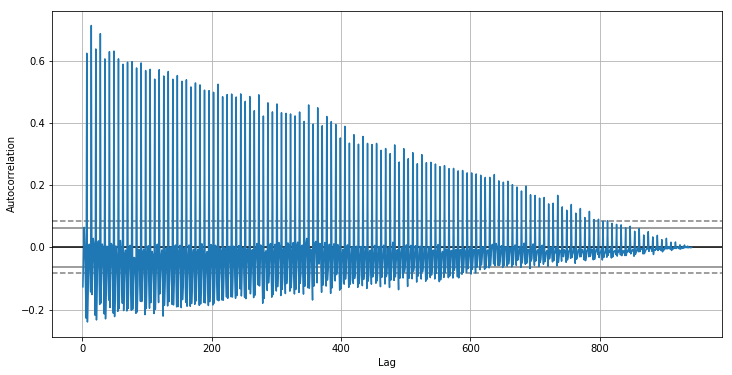

In [10]:
# Make an autocorrelation plot with pandas
# /scrub/
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize=(12, 6))
autocorrelation_plot(store1_data.loc[:, 'Sales'], ax=ax);

StatsModels also comes with some convenient packages for calculating and plotting autocorrelation. Load up these two functions and try them out.

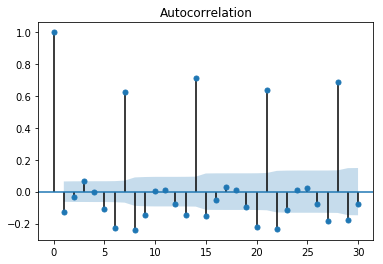

In [11]:
# Make an autocorrelation plot with statsmodels
# /scrub/
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

ax = plot_acf(store1_data.loc[:, 'Sales'], lags=30)

This plots the correlation between the series and a lagged series for the lags indicated on the horizontal axis. For instance, at `0`, the series will be completely correlated with itself, so the blue dot is at `1.0`. The points that fall outside of the blue indicate significant correlation values. Big jumps in autocorrelation appear at lags that are multiples of seven. Our sales data are daily, so it makes a lot of sense that a single Monday's sales would be correlated with the prior Monday's (and the one before it... and so on) -- especially because every Sunday has zero sales!

These plots reveal seasonality in our time series.

In [12]:
# Get the acf values as an array 
# /scrub/
acf(store1_data.loc[:, 'Sales'])

array([ 1.        , -0.12703786, -0.03469319,  0.06454937, -0.00180766,
       -0.10904274, -0.22783504,  0.6248786 , -0.2401515 , -0.14869745,
        0.00624578,  0.01006485, -0.07707318, -0.14363042,  0.71435429,
       -0.15188393, -0.05551585,  0.02901103,  0.01113764, -0.09400308,
       -0.21875595,  0.63865175, -0.23360339, -0.11384778,  0.00788378,
        0.02095157, -0.07841381, -0.18374454,  0.68804836, -0.17930762,
       -0.07734379,  0.01060628, -0.00112696, -0.09014802, -0.21435881,
        0.60668328, -0.230107  , -0.12860469,  0.00378231,  0.00237381,
       -0.10721685])

## Partial Autocorrelation and the Partial Autocorrelation Function (PACF)

Another important chart for diagnosing your time series is the partial autocorrelation chart (PACF). This is similar to autocorrelation, but, instead of being just the correlation at increasing lags, it is the correlation at a given lag, _controlling for the effect of previous lags._

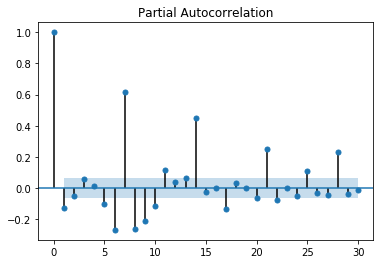

In [13]:
# Plot the partial autocorrelations using statsmodels
# /scrub/
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

ax = plot_pacf(store1_data.loc[:, 'Sales'], lags=30)

This plots the correlation at a given lag (indicated by the horizontal axis), controlling for all of the previous lags. We continue to see big jumps in correlation at the weekly time lags, but they go down through time. 

**Note:** A lot of this pattern is driven by the zeros on Sundays.

**Exercise (1 min, post immediately.)**

- How might seasonality in a data set (monthly, weekly, etc.) show up in autocorrelation plots?

/scrub/

Seasonality over a given time period would show up as autocorrelation over the corresponding lag -- for instance, weekly seasonality would show up as autocorrelation with a lag of seven days.

## Problems Posed by Autocorrelation

Suppose we built a linear regression model to predict sales from other features in our dataset. Unfortunately, certain properties of linear regression hold only when the residuals/error terms are independent of one another, and autocorrelation removes this independence. For instance, if our model underestimates sales on Day 20, then it is likely to underestimate them on Day 27 as well, because of the autocorrelation.

> **What are some problems that could arise when using autocorrelated data with a linear model?**
* Estimated regression coefficients are still unbiased, but they are no longer the minimum-variance unbiased estimators.
* The MSE may seriously underestimate the true variance of the errors.
* The standard error of the regression coefficients may seriously underestimate the true standard deviation of the estimated regression coefficients.
* Statistical intervals and inference procedures are no longer strictly applicable.

Statisticians have developed specialized models specifically for time series data because of these issues.

# Recap

* Autocorrelation is a measure of how dependent a data point is on previous data points.
* Investigating ACF and PACF plots can help us identify seasonality in our time series data.
* Simple linear regression is problematic for data with autocorrelations because these data no longer have independent errors.

**Exercise (10 mins., pair programming)**

In [14]:
euro = pd.read_csv('../assets/data/euretail.csv')
euro.head()

,Year,Qtr1,Qtr2,Qtr3,Qtr4
0,1996,89.13,89.52,89.88,90.12
1,1997,89.19,89.78,90.03,90.38
2,1998,90.27,90.77,91.85,92.51
3,1999,92.21,92.52,93.62,94.15
4,2000,94.69,95.34,96.04,96.30


- Set "Year" as the index

In [15]:
# /scrub/
euro.set_index('Year', inplace=True)

- Run the code below. What is does `.stack()` do?

In [16]:
euro.head()

,Qtr1,Qtr2,Qtr3,Qtr4
Year,,,,
1996,89.13,89.52,89.88,90.12
1997,89.19,89.78,90.03,90.38
1998,90.27,90.77,91.85,92.51
1999,92.21,92.52,93.62,94.15
2000,94.69,95.34,96.04,96.30


In [17]:
euro = euro.stack()

In [18]:
euro.head()

Year      
1996  Qtr1    89.13
      Qtr2    89.52
      Qtr3    89.88
      Qtr4    90.12
1997  Qtr1    89.19
dtype: float64

/scrub/

`.stack()` takes a DataFrame and turns it into a series with a two-level index by making the column names a new second-level row index for each element of the original index.

- Make a line plot of the values in `euro`

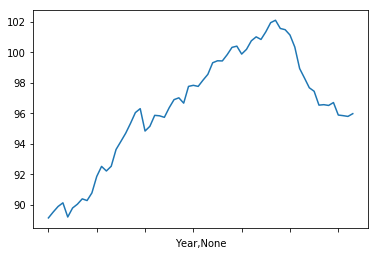

In [19]:
# /scrub/

ax = euro.plot();

- Use `plot_acf` and `plot_pacf` to look at the autocorrelation in the data set.

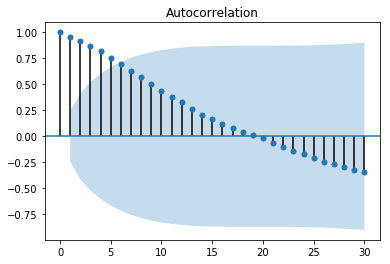

In [20]:
# /scrub/
ax = plot_acf(euro, lags=30);

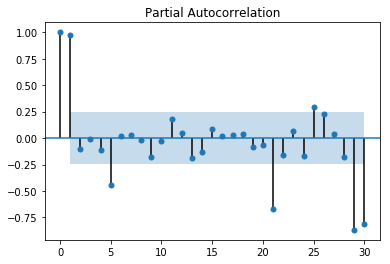

In [21]:
# /scrub/
ax = plot_pacf(euro, lags=30)

- Interpret your findings.

/scrub/

This time series shows strong initial autocorrelation that gradually diminishes. The partial autocorrelation is close to zero or somewhat negative for lags higher than one, indicating that the autocorrelation is largely due to a strong relationship between each year and the next.

$\blacksquare$